In [1]:
import os
import random
import numpy as np
import pandas as pd
import sys
import sklearn
import seaborn as sns
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize , word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation as LDA
import gensim
from nltk.stem import *
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer 
from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from pprint import pprint
from nltk.corpus import stopwords
from sklearn import cluster
from summa import keywords
from sklearn.decomposition import NMF

In [6]:
df_speech=pd.read_csv('obama_clean.csv')
df_speech.head()

,title,content,clean_content,content_nouns,content_verbs
0,First Presidential Inaugural Addre,[Chief Justice John G. \n\t\tRoberts administe...,chief justice john robert administer oath offi...,justice john robert administer oath office bar...,obama preserve stand remain lose fail face pur...
1,>American Rhetoric: Barack Obama: First Presid...,: First Presidential Weekly Address \n(01-24-0...,presidential weekly address barack obama presi...,address barack addressfirst broadcast washingt...,translate lose jumpstart save recognize expect...
2,Al-Arabiya Television Interview With Hisham Me...,"Mr. Melhem:Mr. President, thank you for this o...",melhem opportunity obama melhem sir personal e...,melhem opportunity melhem envoy senator mitche...,obama involve make engage mitchell tell start ...
3,Remarks on Executive Compensation,"Thank you, Tim, for your \n\t\thard work on th...",work issue economic recovery economic crisis f...,work issue recovery crisis face lifetime crisi...,make turn feel congress save spend hear want f...
4,First Presidential Prime Time Press \nConferen,"Good \n\t\tevening, everybody. Please be seate...",good seat question speak state economy recover...,seat question state economy recovery plan moti...,speak elkhart lose sustain lose pay stop spend...


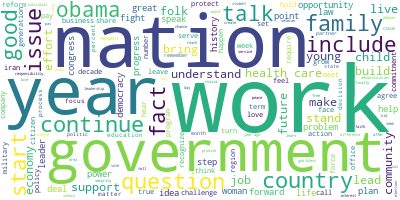

In [7]:
speech=','.join(df_speech['clean_content'].values.tolist())
wordcloud=WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(speech)
wordcloud.to_image()

# LDA using Gensim

first we choose topic_number=15 to generate the topics of the speeches, and we print out the first 4 topic. 

In [222]:
data=df_speech['clean_content'].values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words=list(sent_to_words(data))
word_corpora=corpora.Dictionary(data_words)
texts=data_words
corpus=[word_corpora.doc2bow(text) for text in texts]

lda_model=gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=word_corpora,
                                       num_topics=15, passes=10, workers=2)
pprint(lda_model.print_topics()[0:4])
doc_lda=lda_model[corpus]

[(0,
  '0.016*"governor" + 0.014*"job" + 0.013*"work" + 0.012*"romney" + '
  '0.011*"tax" + 0.009*"year" + 0.009*"obama" + 0.008*"business" + 0.008*"cut" '
  '+ 0.006*"economy"'),
 (1,
  '0.028*"gun" + 0.009*"oil" + 0.008*"energy" + 0.007*"violence" + 0.007*"law" '
  '+ 0.007*"check" + 0.006*"background" + 0.006*"work" + 0.006*"family" + '
  '0.005*"congress"'),
 (2,
  '0.009*"work" + 0.008*"family" + 0.007*"veteran" + 0.007*"child" + '
  '0.007*"god" + 0.007*"love" + 0.006*"life" + 0.006*"live" + 0.006*"nation" + '
  '0.006*"year"'),
 (3,
  '0.016*"question" + 0.012*"obama" + 0.012*"work" + 0.010*"republican" + '
  '0.008*"issue" + 0.007*"congress" + 0.007*"job" + 0.006*"economy" + '
  '0.005*"folk" + 0.005*"term"')]


In [6]:
word_dict = {}
for i in range(15):
    words = lda_model.show_topic(i, topn = 10)
    word_dict['Topic ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict).transpose()

,0,1,2,3,4,5,6,7,8,9
Topic 01,isil,terrorist,syria,work,attack,continue,iraq,military,force,fight
Topic 02,live,family,year,god,honor,father,nation,work,story,stand
Topic 03,young,city,work,obama,question,year,good,job,talk,economy
Topic 04,young,question,country,work,africa,good,muslim,obama,start,vietnam
Topic 05,care,health,work,cost,good,community,job,start,space,doctor
Topic 06,work,school,child,woman,good,community,family,student,young,government
Topic 07,question,work,issue,obama,security,country,government,continue,problem,good
Topic 08,cuban,cuba,question,work,castro,business,start,country,government,america
Topic 09,gun,family,violence,law,work,background,check,live,community,love
Topic 10,iran,nuclear,weapon,deal,iranian,sanction,security,israel,program,peace


In [212]:
processed_docs=[]
for i in range(len(df_speech)):
    processed_docs.append(word_tokenize(df_speech["clean_content"][i]))

dictionary = gensim.corpora.Dictionary(processed_docs)  # Bag of words
dictionary.filter_extremes(no_below=2, no_above=0.8)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=3, limit=15, step=1)
#model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=3, limit=8, step=1)


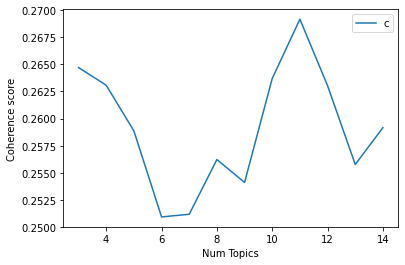

In [8]:
# Show graph
limit=15; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

By looking at the plot, we can see that the optimal number of topic is 11. 

Thus we choos topic_number=10 to generate the topics of the speeches, and print out the first 4 topics

In [349]:
lda_model2=gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=word_corpora,
                                       num_topics=12, passes=10, workers=2)
pprint(lda_model2.print_topics())
doc_lda=lda_model2[corpus]

[(0,
  '0.008*"work" + 0.008*"law" + 0.007*"question" + 0.007*"court" + '
  '0.005*"issue" + 0.005*"year" + 0.005*"congress" + 0.004*"justice" + '
  '0.004*"republican" + 0.004*"process"'),
 (1,
  '0.022*"israel" + 0.015*"africa" + 0.009*"peace" + 0.008*"african" + '
  '0.006*"palestinian" + 0.005*"work" + 0.005*"young" + 0.005*"security" + '
  '0.005*"kenya" + 0.005*"israeli"'),
 (2,
  '0.010*"work" + 0.007*"security" + 0.006*"force" + 0.006*"continue" + '
  '0.006*"iraq" + 0.006*"russia" + 0.006*"military" + 0.006*"nation" + '
  '0.006*"afghanistan" + 0.006*"support"'),
 (3,
  '0.014*"work" + 0.008*"young" + 0.007*"good" + 0.007*"school" + 0.006*"job" '
  '+ 0.006*"child" + 0.006*"year" + 0.006*"community" + 0.005*"question" + '
  '0.005*"education"'),
 (4,
  '0.012*"isil" + 0.010*"work" + 0.008*"question" + 0.008*"government" + '
  '0.008*"continue" + 0.007*"country" + 0.007*"syria" + 0.006*"terrorist" + '
  '0.006*"issue" + 0.006*"security"'),
 (5,
  '0.014*"nation" + 0.007*"work" 

In [274]:
df_speech['topic'] = [sorted(doc_lda[text])[0][0] for text in range(len(df_speech['content']))]
df1=pd.DataFrame(df_speech.topic.value_counts())
df1.columns=['topic_num']
df1['topic']=df1.index
df1['topic']=['justice', 'israel_war', 'military',
             'education', '']
#df1=df1.sort_values(by=['topic'])

In [276]:
df_speech.to_csv('gensim_topic_classifier.csv', index=False)

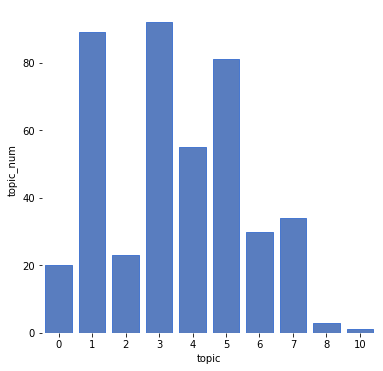

In [258]:
f, ax = plt.subplots(figsize = (6,6))
sns.barplot(x = 'topic', y = 'topic_num', data = df1,color = 'b', edgecolor = 'b')
sns.set_color_codes('muted')
#ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

From the plot above, I count the number of speeches in each topic.

It shows topic 3 contain most speeches, topic 3 talks about the family, child, black people, work, women, and life, education.

The second highest topic is topic 1, which is related to work, law, 

The third highest topic is topic 5, 

# LDA using Sklearn

In [8]:
additional= ['say','like','just','dont','don','im','it','ve','re','we',
                'live','youll','youve','things','thing','youre','right','really','lot',
                'make','know','people','way','day',
                'little', 'maybe','men',"americans","america",
                'kind','heart',"american",'beverybrief','behooves','president','united',"states", "s", "u","evening", "afternoon", "welcome",
               "everybody", "goodbye", 'want', 'take', 'see', 'say', 'go','like','youre','ive','im','really','id','just','dont','didnt','thi','wa',
                  'say','know','make','people',"today",'way','day','time','year','tonight', 'u', 'country', 'articl', 'mon']        


stop_word_file=open('stopwords_file.txt', 'r')
words=stop_word_file.read()
stop_words=words.split(",")+additional

vectorizer = CountVectorizer(stop_words=stop_words, lowercase=True, max_df=0.5, min_df=10)
matrix = vectorizer.fit_transform(df_speech['content'])

In [12]:
# 15 topics 
lda  = LDA(n_components=15, random_state=42) 
lda.fit(matrix)
for idx, topic in enumerate(lda.components_):
    print(f"Top 10 words in Topic #{idx}:")
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]) 
    print('')

Top 10 words in Topic #0:
['money', 'recovery', 'school', 'energy', 'college', 'students', 'crisis', 'businesses', 'financial', 'education']

Top 10 words in Topic #1:
['cubans', 'human', 'sanctions', 'americas', 'nuclear', 'iranian', 'deal', 'cuban', 'cuba', 'iran']

Top 10 words in Topic #2:
['honor', 'uniform', 'mission', 'forces', 'service', 'afghanistan', 'troops', 'military', 'iraq', 'veterans']

Top 10 words in Topic #3:
['problem', 'kids', 'city', 'school', 'issue', 'feel', 'big', 'education', 'obama', 'question']

Top 10 words in Topic #4:
['spending', 'plan', 'cuts', 'romney', 'middle', 'pay', 'deficit', 'governor', 'businesses', 'tax']

Top 10 words in Topic #5:
['fuel', 'cars', 'industry', 'gas', 'space', 'companies', 'clean', 'india', 'oil', 'energy']

Top 10 words in Topic #6:
['cooperation', 'society', 'audio', 'democracy', 'intelligence', 'africans', 'african', 'kenya', 'china', 'africa']

Top 10 words in Topic #7:
['indonesia', 'partnership', 'tpp', 'vietnam', 'asean',

In [14]:
# 11 topics
lda2  = LDA(n_components=11, random_state=42) 
lda2.fit(matrix)
for idx, topic in enumerate(lda2.components_):
    print(f"Top 10 words in Topic #{idx}:")
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]) 
    print('')

Top 10 words in Topic #0:
['business', 'students', 'crisis', 'energy', 'college', 'companies', 'workers', 'financial', 'education', 'businesses']

Top 10 words in Topic #1:
['trade', 'global', 'freedom', 'region', 'cuban', 'democracy', 'cuba', 'rights', 'human', 'nations']

Top 10 words in Topic #2:
['peace', 'freedom', 'iraq', 'faith', 'honor', 'troops', 'service', 'military', 'afghanistan', 'veterans']

Top 10 words in Topic #3:
['problems', 'problem', 'terms', 'folks', 'feel', 'big', 'issue', 'issues', 'obama', 'question']

Top 10 words in Topic #4:
['reform', 'pay', 'percent', 'plan', 'governor', 'question', 'republicans', 'obama', 'tax', 'insurance']

Top 10 words in Topic #5:
['percent', 'india', 'space', 'cars', 'gas', 'west', 'climate', 'clean', 'oil', 'energy']

Top 10 words in Topic #6:
['background', 'black', 'parents', 'rights', 'kids', 'man', 'school', 'violence', 'love', 'gun']

Top 10 words in Topic #7:
['boston', 'burma', 'southeast', 'malaysia', 'philippines', 'ted', '

# K-Means

In [31]:

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
    sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[:n_feats])
    plt.show()
        
def run_KMeans(max_k, data):
        max_k += 1
        kmeans_results = dict()
        Sum_of_squared_distances=[]
        for k in range(2, max_k):
            kmeans = cluster.KMeans(n_clusters=k
                                    , init='k-means++'
                                    , n_init=10
                                    , tol=0.0001
                                    , random_state=1)

            kmeans_results.update({k: kmeans.fit(data)})
            Sum_of_squared_distances.append(kmeans.inertia_)


        return (kmeans_results, Sum_of_squared_distances)

428 rows


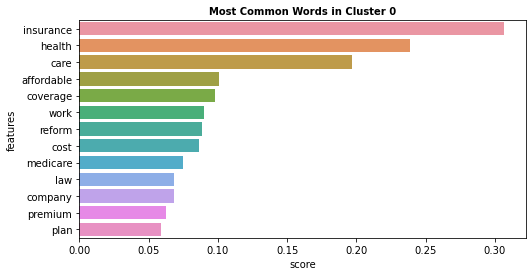

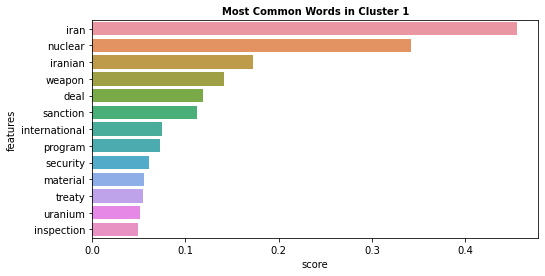

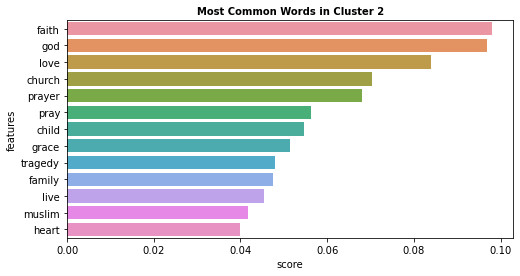

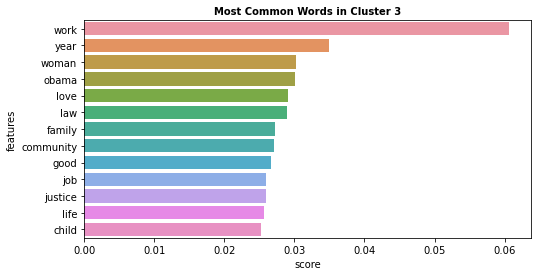

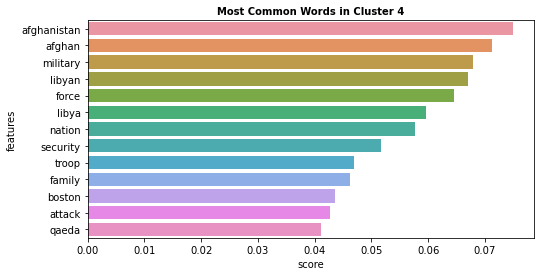

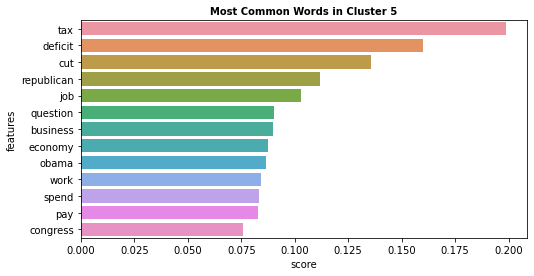

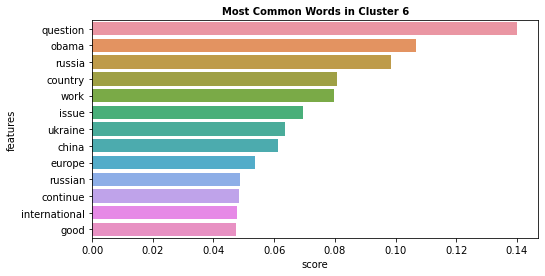

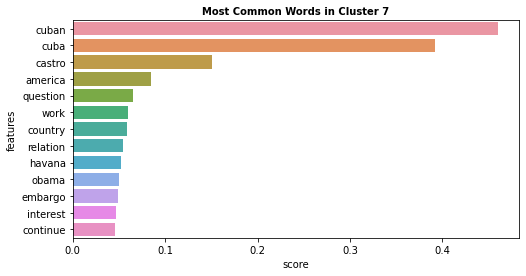

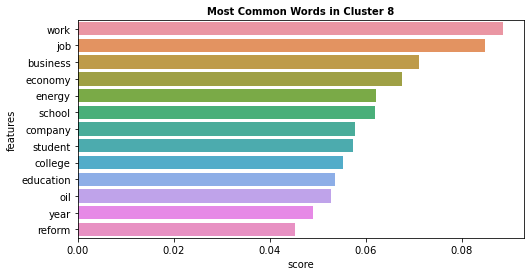

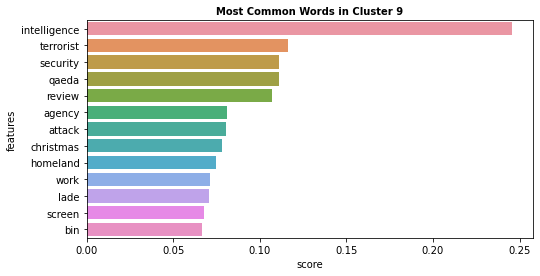

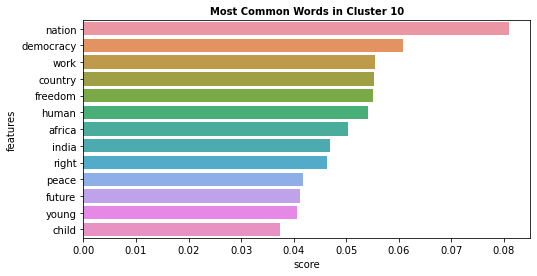

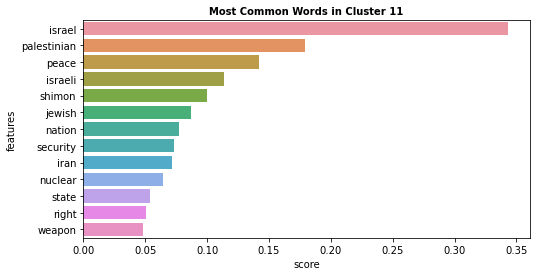

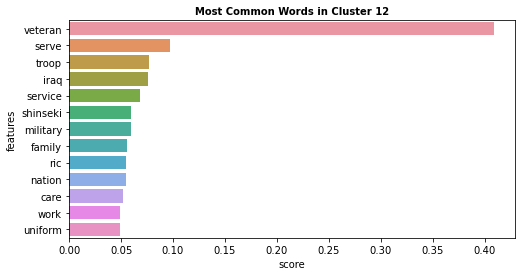

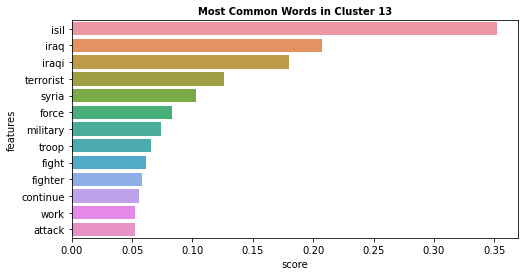

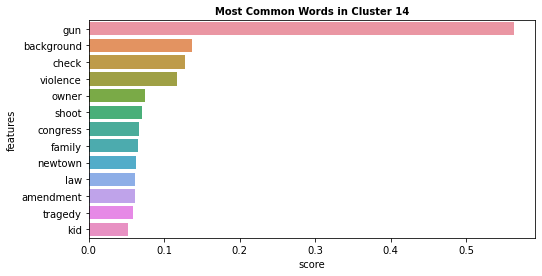

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_speech["clean_content"])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(10, 0)

# Running Kmeans
k = 20
kmeans_results, Sum_of_squared_distances = run_KMeans(k, final_df)


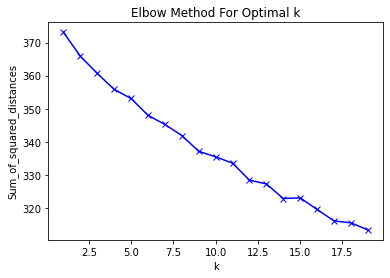

In [37]:
plt.plot(range(1,20), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

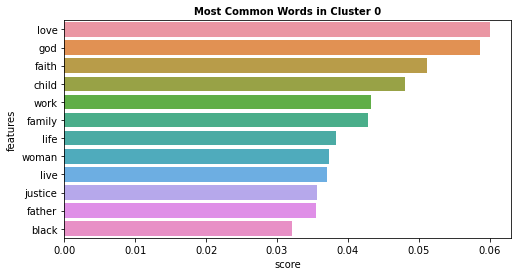

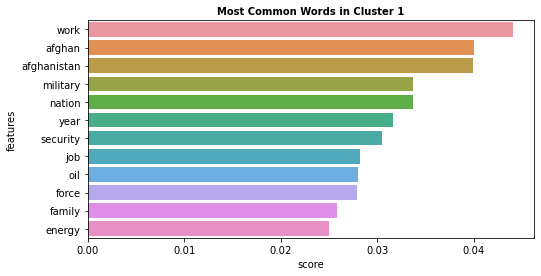

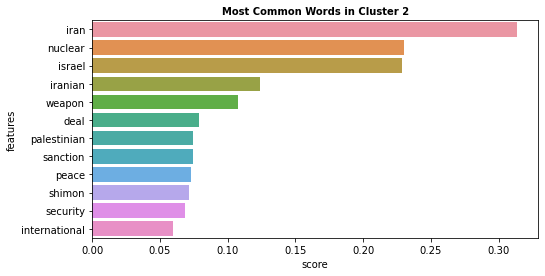

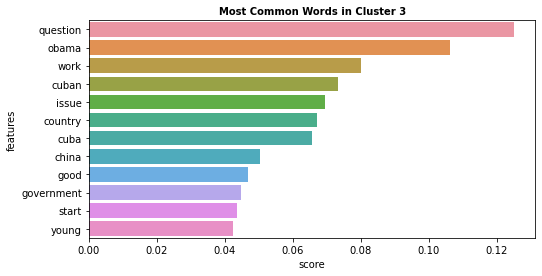

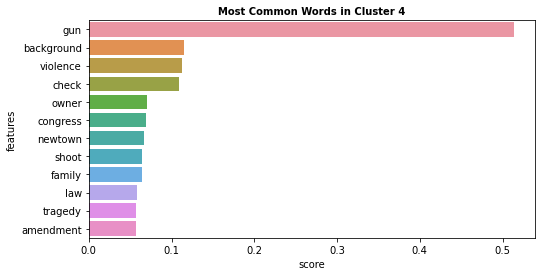

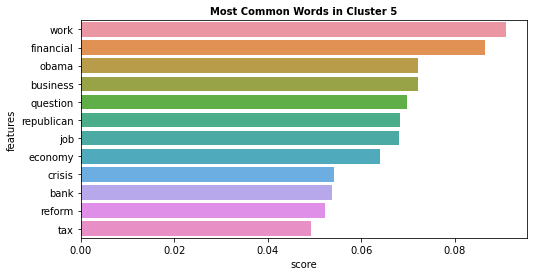

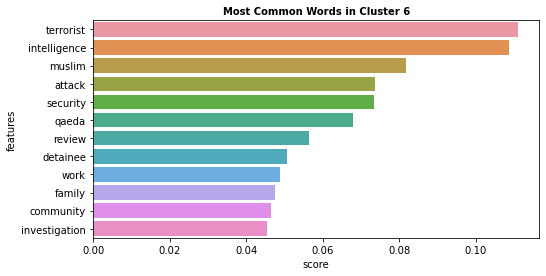

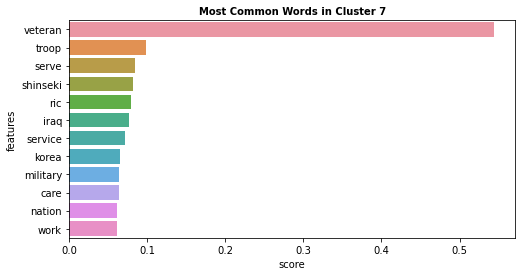

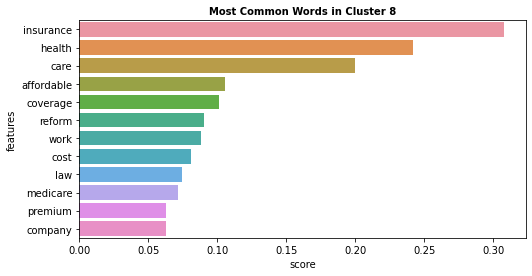

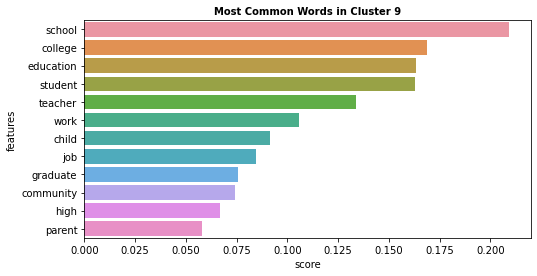

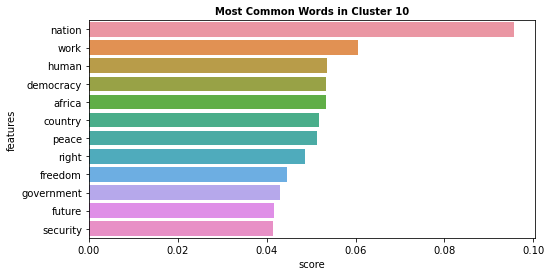

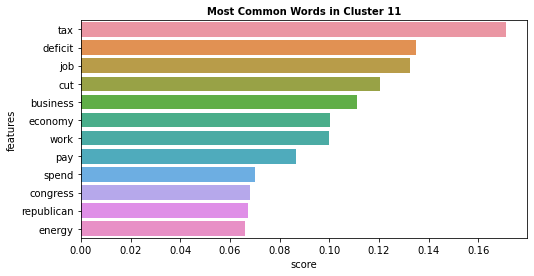

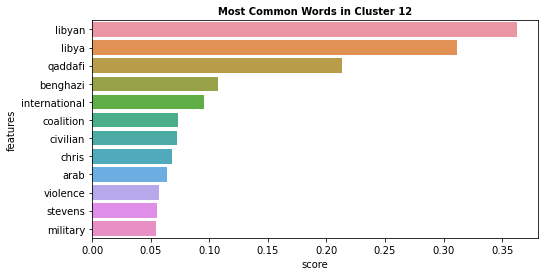

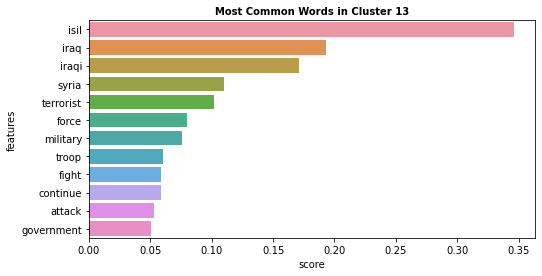

In [40]:
best_result = 14 ##16, 17, 18, 19, 20
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 12
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
#plotWords(dfs, 13)
for i in range(len(dfs)):
    plotWords(dfs[i], 13)

# NMF

we calculate the tf-idf score of our cleaned content, and compute the distribution score of the important words in each topic

In [365]:
vec_nmf=TfidfVectorizer(min_df=50, stop_words=stop_words)
X_nmf=vec_nmf.fit_transform(df_speech['clean_content'])
model_nmf=NMF(n_components=11, random_state=5)
model_nmf.fit(X_nmf)
nmf_feature=model_nmf.transform(X_nmf)

nmf_df = pd.DataFrame(model_nmf.components_, columns=vec_nmf.get_feature_names())
#keywords_topic = []
#topic_num=15
#for j in range(topic_num):
#    keywords_topic.append(keywords.keywords(" ".join([i for i in text_data['clean'][(topic_doc==j).tolist()]]),words=50).split('\n'))
nmf_df.head()   

/Users/sihanwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


,abide,ability,abroad,absolutely,abuse,accept,access,accomplish,account,accountability,...,worship,worst,worth,wound,write,wrong,yesterday,york,young,youth
0,0.019275,0.077117,0.056384,0.005341,0.026955,0.033564,0.077064,0.004144,0.017190,0.035011,...,0.052427,0.014614,0.014646,0.000000,0.028849,0.007493,0.038527,0.012534,0.259024,0.052947
1,0.000000,0.011402,0.007321,0.017316,0.009186,0.026920,0.041723,0.007604,0.012041,0.015279,...,0.000000,0.029372,0.033476,0.000000,0.018755,0.021227,0.003116,0.009603,0.038404,0.000000
2,0.032651,0.036859,0.000000,0.068298,0.016910,0.011561,0.038526,0.045336,0.017247,0.003513,...,0.000000,0.006976,0.017835,0.000000,0.011015,0.026388,0.037944,0.009127,0.167515,0.009816
3,0.001266,0.005652,0.006015,0.007085,0.000000,0.002224,0.000000,0.006933,0.008881,0.000000,...,0.000000,0.004862,0.000050,0.000000,0.000000,0.000000,0.000000,0.010361,0.000000,0.000000
4,0.004537,0.018862,0.010697,0.000000,0.009431,0.039185,0.008934,0.012012,0.014487,0.000000,...,0.048580,0.027347,0.020267,0.071206,0.100504,0.052566,0.009109,0.035443,0.192490,0.038101


In [366]:
df_speech['topic']=[np.argmax(i) for i in nmf_feature]
df_speech.to_csv('NMF_topic.csv', index=False)

# first top 10 words in each topic and their distribution scores

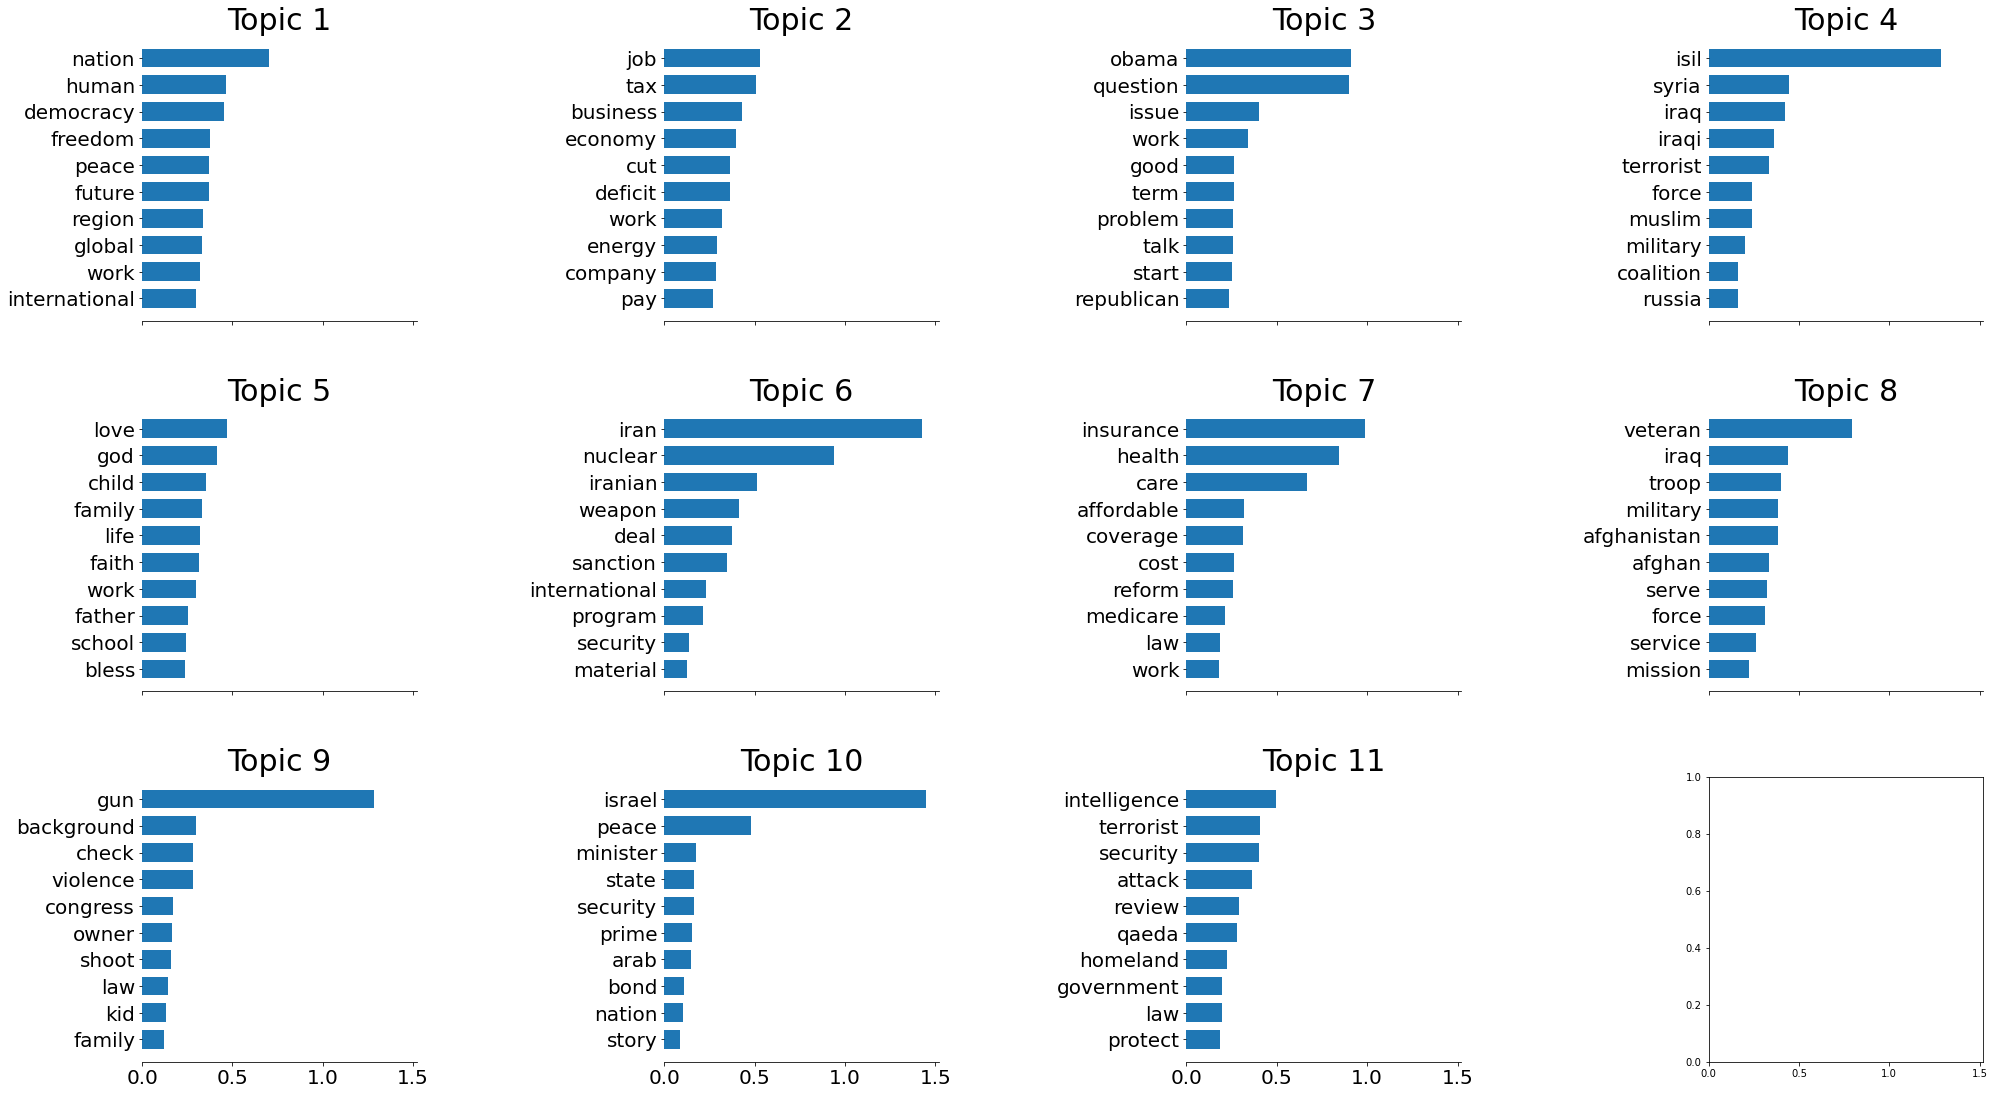

In [367]:
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(3, 4, figsize=(33, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=1, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(
    model_nmf,
    vec_nmf.get_feature_names(),
    10)   

# find each topic contains how many speeches using NMF

In [351]:
topic_doc=pd.DataFrame(nmf_feature).idxmax(axis=1).value_counts()
df=pd.DataFrame()
def topic_words(model, n_top_words, feature_names):
    top=[]
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        for i in top_features_ind:
            top.append(feature_names[i])
    return top
df['topic']=topic_words(model_nmf,1,vec_nmf.get_feature_names())  
df['topic_num']=topic_doc

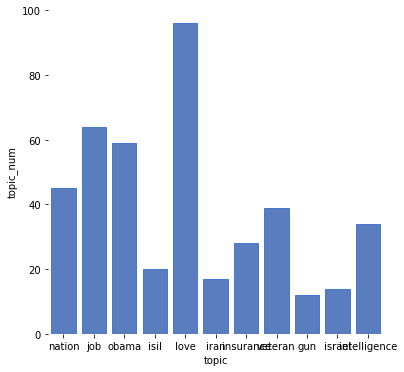

In [75]:
f, ax = plt.subplots(figsize = (6,6))
sns.barplot(x = 'topic', y = 'topic_num', data = df,color = 'b', edgecolor = 'b')
sns.set_color_codes('muted')
#ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

From the plot above, it shows that topic5 has highest number of speeches.

According to the distribution score plot above, topic5 is about { love, family, life, child}

topic3 is the second largest topic, it's about {issue, work, china, talk}

topic2 is the third largest topic, contains words {engery, job, tax, deflict, economy}



In [122]:
topic_dist=pd.DataFrame(nmf_feature)
#topic_dist.columns = [" ".join(topic[:4]) for topic in topics]
top_4=[]

for topic_idx, topic in enumerate(model_nmf.components_):
        top_4_ind = (-topic).argsort()[:4]
        top_4.append([vec_nmf.get_feature_names()[i] for i in top_4_ind])
topic_dist.columns=[" ".join(topic) for topic in top_4]

df_speech['date'] = pd.to_datetime(df_speech['date'])
df_speech['year'] = pd.DatetimeIndex(df_speech['date']).year
#df_speech['Date (by month)'] = [month.to_timestamp() for month in df_speech['month']]
#df_speech = df_speech.set_index('Date (by month)')

topic_dist=pd.concat([df_speech, topic_dist], axis=1)
topic_dist['month'] = topic_dist['date'].dt.to_period('M')
topic_dist['Date (by month)'] = [month.to_timestamp() for month in topic_dist['month']]
topic_dist=topic_dist.set_index('Date (by month)')
topic_df=topic_dist.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,18]]

In [201]:
topic_dist.to_csv('topic_df.csv')


the following plots show the topic distribution from 2009 to 2017

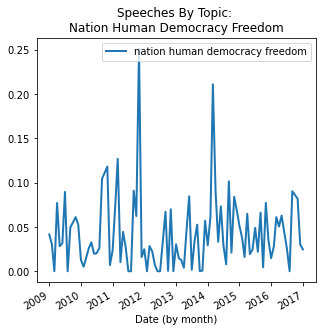

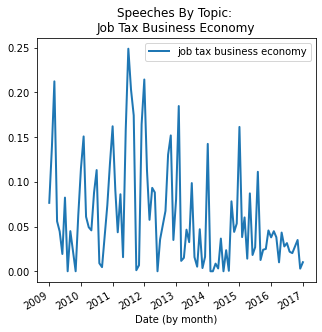

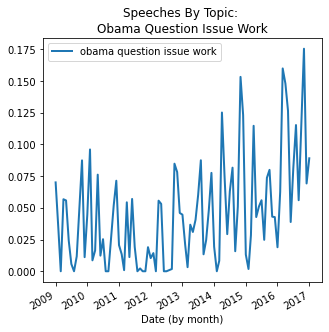

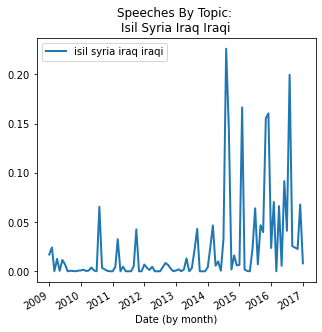

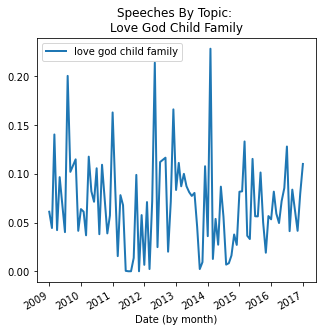

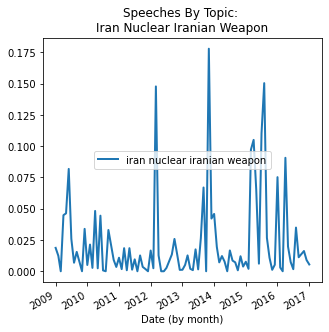

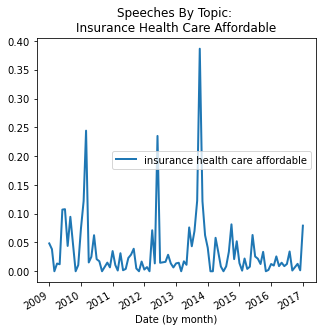

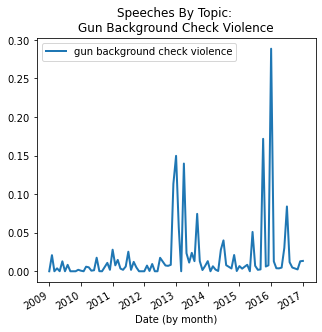

In [138]:
plt.rcParams['figure.figsize'] = [5, 5]
for i in range(len(top_4)):
    #topic_label = " ".join(top_4[i])
    topic_df.groupby(topic_df.index)[[top_4[i]]].mean().plot(title=f'Speeches By Topic: \n{top_4[i].title()}', linewidth=2)

# word clouds for each topic

In [196]:
topic=[]
for i in range(9):
    topic.append('Topic '+str(i+1))

top_features=[]

for topic_idx, topic in enumerate(model_nmf.components_):
        top_features_ind = (-topic).argsort()[:1000]
        top_features.append([vec_nmf.get_feature_names()[i] for i in top_features_ind])


In [197]:
words=top_features
for i in range(len(top_features)):
    words[i]=' '.join(top_features[i])

In [373]:
df_words=pd.DataFrame()

#df_words1['topic']=[1,2, 3, 4, 5, 6, 7,8,9]
df_words['words']=words
df_words1=df_words.iloc[[0,1,2,3,4,5,6,8, 10]]
df_words1['topic']=[1,2, 3, 4, 5, 6, 7,8,9]


/var/folders/c6/_5880zh154q_t4yfgcxjn9lr0000gn/T/ipykernel_1661/3402753269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words1['topic']=[1,2, 3, 4, 5, 6, 7,8,9]


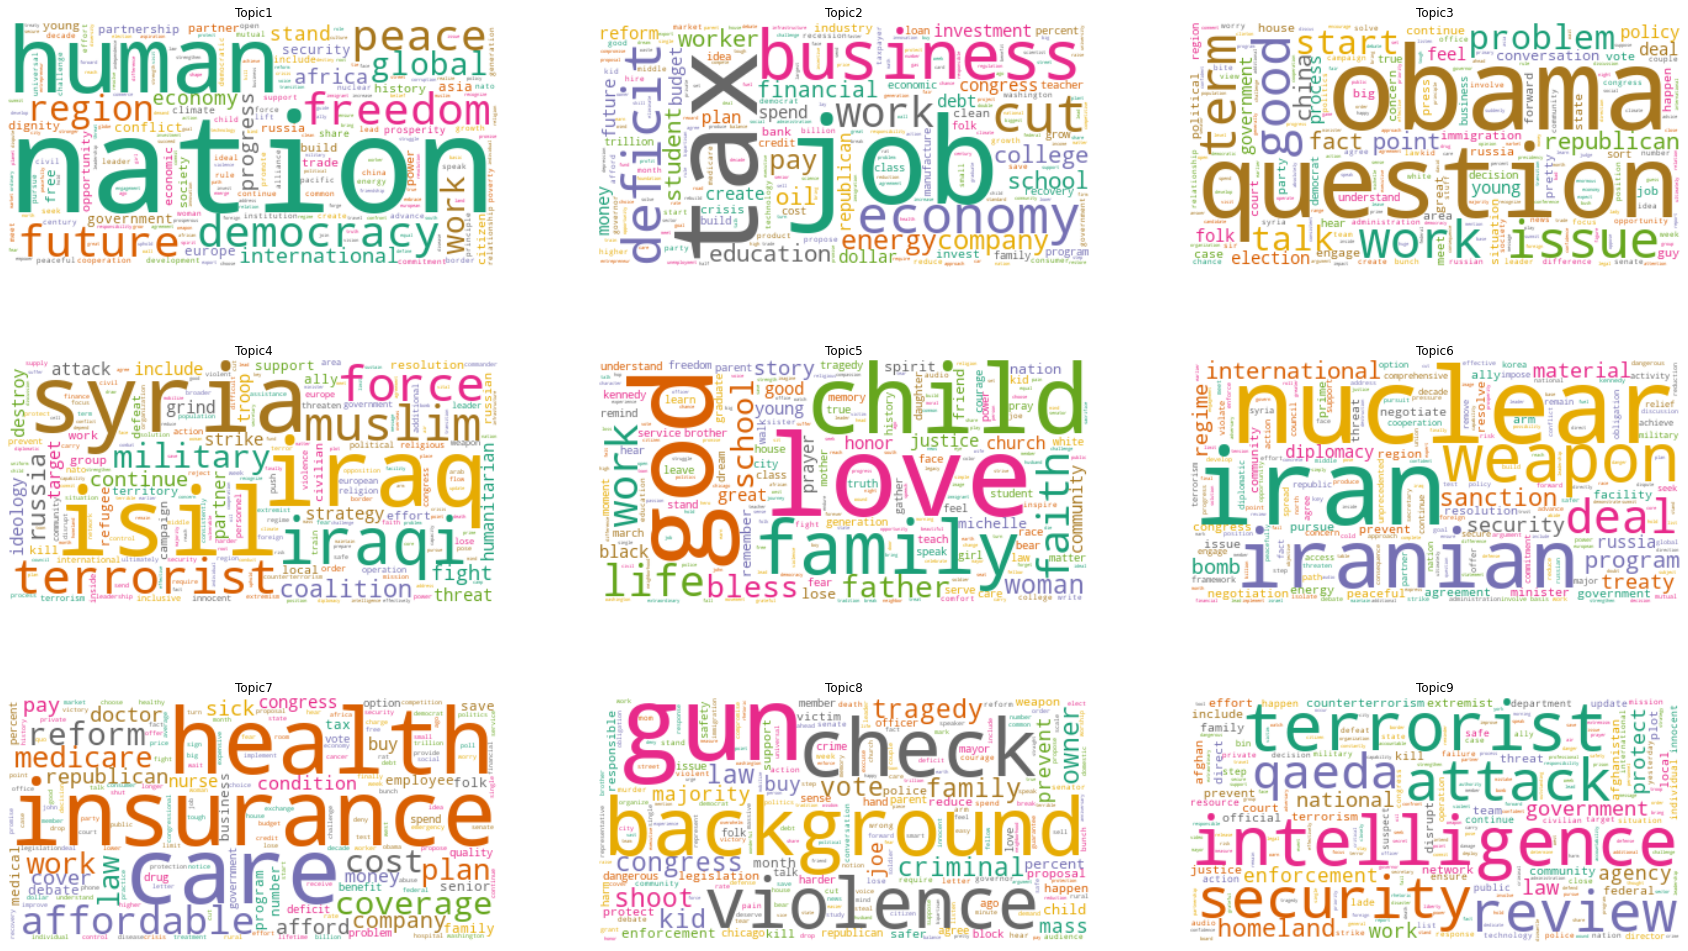

In [200]:
plt.rcParams['figure.figsize'] = [30, 30]
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", random_state=42)
for index, speech in enumerate(df_words1['words'].iloc[:15]):
        wc.generate(speech)
        plt.subplot(5, 3, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title("Topic"+str(index+1),fontweight='normal') 
plt.show()

# finding external factors 
all sources are found in this website:
    https://www.macrotrends.net/countries/USA/united-states/education-spending
    https://stats.oecd.org/Index.aspx?DataSetCode=MIG#

## health care category

##### comparing two graphs, Obama had more speeches related to health insurance from 2013 to 2014. As the second plot, the health insurance coverage in US increased significantly from 2013 t0 2015. 

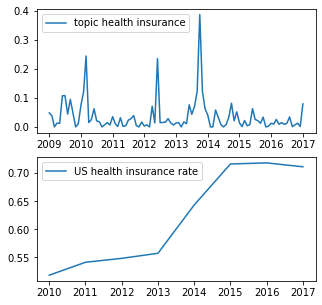

In [323]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
#plt.rcParams['figure.figsize'] = [5, 5]
health=topic_df.groupby(topic_df.index)[[top_4[6]]].mean()
ax1.plot(health.index, health['insurance health care affordable'], label='topic health insurance')
ax1.legend(loc="upper left")
healthdata=[0.518, 0.541, 0.548, 0.557, 0.643, 0.716, 0.718, 0.711]
date=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax2.plot(date, healthdata, label='US health insurance rate')
ax2.legend(loc="upper left")
plt.show()

## economy and tax
In the first plot, Obama often gave economy related speeched during his 2 presidential terms. Plot has higher distribution around 2009, 2011 -2012, and relatively high in 2013.  The second plot contains the unployment rate, economy growth rate, and foreign trade rate. The unemployment rate went down all the time from 2010 as Obama made the speeches in 2009.  The economy rate did not change significantly. However, the international trade increased from 2009 to 2010 with a large percent. In 2009, he made speeches about G-20 submit conference in London and compensation salary cap,  speech at Moscow economic school.

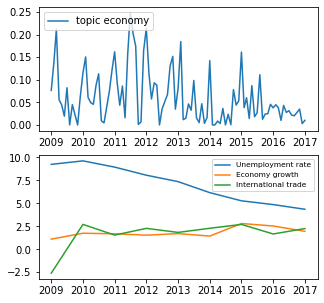

In [347]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
plt.rcParams['figure.figsize'] = [5, 5]
tax=topic_df.groupby(topic_df.index)[[top_4[1]]].mean()
ax1.plot(tax.index, tax['job tax business economy'], label='topic economy')
ax1.legend(loc="upper left")

econ=[1.11,1.75,1.69,1.54,1.71,1.44,2.81,2.54,1.96]
trade=[-2.6,2.71,1.55,2.28,1.84,2.29,2.71,1.67,2.26]
unemp=[9.25,9.63,8.95,8.07,7.37,6.17,5.28,4.87,4.36]
date=[2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax2.plot(date, unemp, label='Unemployment rate')
ax2.plot(date, econ, label='Economy growth')
ax2.plot(date, trade, label='International trade')
ax2.legend(loc="upper right",prop={'size': 7.5})
plt.show()

# crime and violence

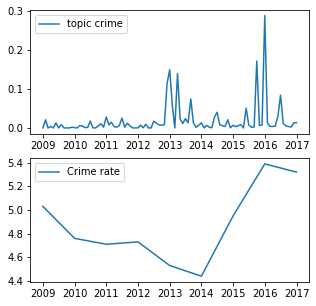

In [333]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
plt.rcParams['figure.figsize'] = [5, 5]
violence=topic_df.groupby(topic_df.index)[[top_4[7]]].mean()
ax1.plot(violence.index, violence['gun background check violence'], label='topic crime')
ax1.legend(loc="upper left")

crime=[5.03,4.76,4.71,4.73,4.53,4.44,4.95,5.39,5.32]
date=[2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax2.plot(date, crime, label='Crime rate')
ax2.legend(loc="upper left")
plt.show()

# military spending

source: https://www.thebalance.com/u-s-military-budget-components-challenges-growth-3306320

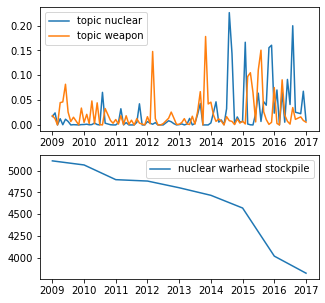

In [370]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
plt.rcParams['figure.figsize'] = [5, 5]
cost=topic_df.groupby(topic_df.index)[[top_4[3]]].mean()
weapon=topic_df.groupby(topic_df.index)[[top_4[5]]].mean()
ax1.plot(cost.index, cost['isil syria iraq iraqi'], label='topic nuclear')
ax1.plot(cost.index, weapon['iran nuclear iranian weapon'], label='topic weapon')
ax1.legend(loc="upper left")

nulcear=[5113, 5066,4897,4881, 4804 ,4717, 4571, 4018, 3822]
#military=[8157,8516, 8552, 8163, 7464, 7536, 7364, 7676, 8189]
date=[2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax2.plot(date, nulcear, label='nuclear warhead stockpile')
#ax2.plot(date,military, label='military spending')
ax2.legend(loc="upper right")
plt.show()

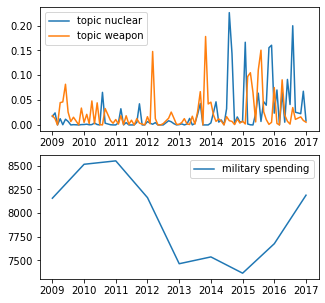

In [371]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
plt.rcParams['figure.figsize'] = [5, 5]
cost=topic_df.groupby(topic_df.index)[[top_4[3]]].mean()
weapon=topic_df.groupby(topic_df.index)[[top_4[5]]].mean()
ax1.plot(cost.index, cost['isil syria iraq iraqi'], label='topic nuclear')
ax1.plot(cost.index, weapon['iran nuclear iranian weapon'], label='topic weapon')
ax1.legend(loc="upper left")

#nulcear=[5113, 5066,4897,4881, 4804 ,4717, 4571, 4018, 3822]
military=[8157,8516, 8552, 8163, 7464, 7536, 7364, 7676, 8189]
date=[2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
#ax2.plot(date, nulcear, label='nuclear warhead stockpile')
ax2.plot(date,military, label='military spending')
ax2.legend(loc="upper right")
plt.show()

# Immigration

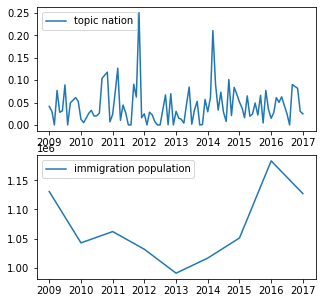

In [345]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
plt.rcParams['figure.figsize'] = [5, 5]
people=topic_df.groupby(topic_df.index)[[top_4[0]]].mean()
ax1.plot(people.index, people['nation human democracy freedom'], label='topic nation')
ax1.legend(loc="upper left")

immi=[1130818, 1042625,1062040,1031631,990553,1016518,1051031,1183505,1127167]
date=[2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax2.plot(date, immi, label='immigration population')
ax2.legend(loc="upper left")
plt.show()

# Education
source: https://www.statista.com/statistics/184260/educational-attainment-in-the-us/

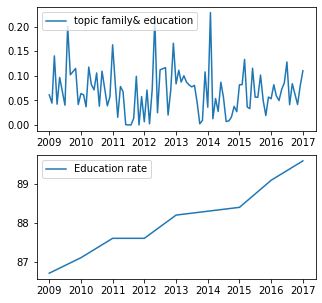

In [385]:
fig, [ax1, ax2]=plt.subplots(2, 1)
#title('Topic 6: health insurance issues')
plt.rcParams['figure.figsize'] = [5, 5]
people=topic_df.groupby(topic_df.index)[[top_4[4]]].mean()
ax1.plot(people.index, people['love god child family'], label='topic family& education')
ax1.legend(loc="upper left")

immi=[86.7, 87.1, 87.6,87.6, 88.2, 88.3, 88.4, 89.1, 89.6]
date=[2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax2.plot(date, immi, label='Education rate')
ax2.legend(loc="upper left")
plt.show()